#### K Means Clustering:
1. Start with K centroids by putting them at random place. Here k=2
2. Compute distance of every point from centroid and cluster them accordingly.
3. Adjust centroids so that they become center of gravity for given cluster.
4. Again re-cluster every point on their distance with centroid
5. Again adjust centroids.
6. Recompute clusters and repeat this till data points stop changing clusters.

1) How to determine correct number of clusters(K)?
   - Ans: **Elbow Technique**

- SSE = Sum of Squared Errors
- SSE(i) : sum of the squares of distances between each of the datapoints(i) and the corresponding centroid(c1)
- SSE = SSE(1)+SSE(2)+SSE(3)......
- Draw a plot between K vs SSE. As we go on increasing the number of clusters(K) the SSE value goes on decreasing.
- Where in the graph for **K = 4** we can see the **Elbow Technique**.

In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("/Users/kishore/Documents/Kishore/Bloomington/Data Science/Machinelearning practice/py-master/ML/13_kmeans/income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


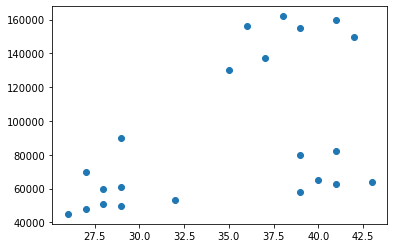

In [3]:
plt.scatter(df['Age'],df['Income($)'])

In [4]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [5]:
y_predicted = km.fit_predict(df[['Age', 'Income($)']])

In [6]:
y_predicted

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0],
      dtype=int32)

In [7]:
df['cluster'] = y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


No handles with labels found to put in legend.


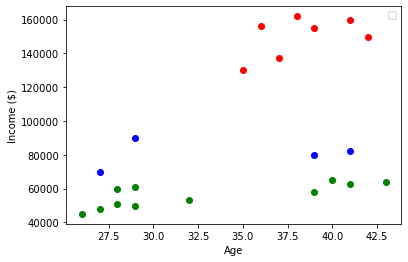

In [10]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1['Age'],df1['Income($)'], color = 'green')
plt.scatter(df2['Age'],df2['Income($)'], color = 'red')
plt.scatter(df3['Age'],df3['Income($)'], color = 'blue')

plt.xlabel('Age')
plt.ylabel("Income ($)")
plt.legend()

#### MinMaxScaler

- Here we are trying to scale the atributes to make sure the plot fit in the expected measurements. 

In [14]:
scaler = MinMaxScaler()
scaler.fit(df[['Income($)']])
df["Income($)"] = scaler.transform(df[["Income($)"]])

scaler.fit(df[['Age']])
df["Age"] = scaler.transform(df[["Age"]])
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


In [15]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age', 'Income($)']])
y_predicted

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [16]:
df['cluster'] = y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0


In [18]:
km.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

- These cluster centers are basically the Centroids of clusters.
Above are the [X, Y] of each cluster.

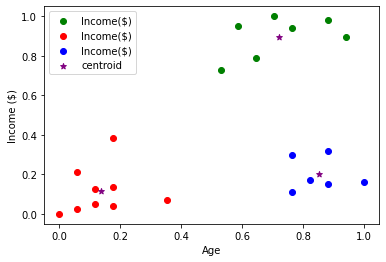

In [20]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1['Age'],df1['Income($)'], color = 'green',label = 'Income($)')
plt.scatter(df2['Age'],df2['Income($)'], color = 'red',label = 'Income($)')
plt.scatter(df3['Age'],df3['Income($)'], color = 'blue',label = 'Income($)')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], color = 'purple',marker = '*', label = 'centroid')
plt.xlabel('Age')
plt.ylabel("Income ($)")
plt.legend()

#### Elbow plot method

- After km.fit we give a parameter called **km.inertia_** that gives the sum of squared error.

In [21]:
k_rng = range(1,10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters = k)
    km.fit(df[['Age', 'Income($)']])
    sse.append(km.inertia_)

In [22]:
sse

[5.434011511988177,
 2.0911363886990766,
 0.47507834985530945,
 0.34910470944195643,
 0.2621792762345213,
 0.22020960864009395,
 0.17462386586687895,
 0.14000044698666528,
 0.10497488680620906]

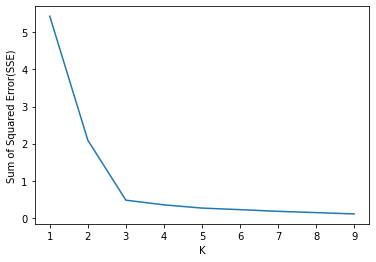

In [24]:
plt.xlabel("K")
plt.ylabel("Sum of Squared Error(SSE)")
plt.plot(k_rng,sse)

Here we can see at K=3 we have our Elbow. So the number of clusters we are considering is correct.

#### Exercise

In [22]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
%matplotlib inline

In [23]:
iris = load_iris()

In [24]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [25]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [26]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)

In [27]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [28]:
df['flower'] = iris['target']

In [29]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [30]:
df = df.drop(["sepal length (cm)", "sepal width (cm)",'flower'], axis = 'columns')

In [31]:
df.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [33]:
km = KMeans(n_clusters=3)
yp = km.fit_predict(df)
yp

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [34]:
df['cluster'] = yp
df.head()

,petal length (cm),petal width (cm),cluster
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0


In [35]:
df.cluster.unique()

array([0, 2, 1], dtype=int32)

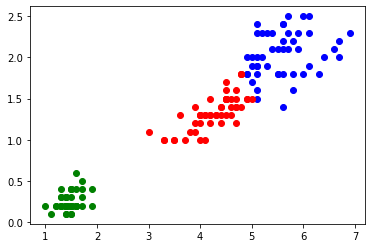

In [38]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'],color = 'green', marker = 'o')
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'],color = 'blue',marker = 'o')
plt.scatter(df3['petal length (cm)'], df3['petal width (cm)'],color = 'red',marker = 'o')

In [39]:
k_rng = range(1,10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters = k)
    km.fit(df[['petal length (cm)','petal width (cm)']])
    sse.append(km.inertia_)

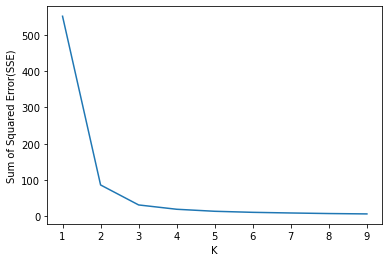

In [41]:
plt.xlabel("K")
plt.ylabel("Sum of Squared Error(SSE)")
plt.plot(k_rng,sse)